### 2020/08/04
- （p値が同じかどうか（必要ない、サンプルが異なるから））
- 選択される特徴量が同じかどうか（ランキングを付けた際に同じ特徴量が選ばれているか）
- サンプル数...to_qubo10_p, to_bqm10_p:100で、enu10_pは210
- (結果)最小のpを持つ特徴量は3つの手法どれでも同じだった。
- (結果)各p値やA以外のp値の順番は異なることもあった

### 2020/08/18
- mushroom_lデータを更新してt^0を出した

In [26]:
import pandas as pd 
import numpy as np

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

In [28]:
#比較対象
enul_p_conf4 = pd.read_csv("../output/mushrooml/enul_p_conf4.csv", sep=',', index_col=0)

In [29]:
enul_p_conf4

,0,1,2,3,5,6,7,8,9,10,...,109,110,111,112,113,114,115,116,117,118
0,1.0,0.001786,0.785714,1.0,0.607143,0.35,1.0,0.9,0.785714,1.0,...,1.0,0.9,1.0,0.785714,0.35,1.0,1.0,1.0,1.0,0.1875


In [30]:
#enul_pにおける各列の最大値
enul_p_conf4.idxmin(axis=1) #1です

0    1
dtype: object

In [31]:
enul_p_conf4.columns

Index(['0', '1', '2', '3', '5', '6', '7', '8', '9', '10',
       ...
       '109', '110', '111', '112', '113', '114', '115', '116', '117', '118'],
      dtype='object', length=118)

---------
-------
今回使うデータ
- 各試行10回ずつ
- 交絡因子として'4'を固定
- データはmushroom_l

In [32]:
#X軸
numreads_10 = np.logspace(1, 4, num=4, base=10, dtype=int)
numreads_5 = [ll*100 for ll in range(1, 21) if ll%5==0 or ll==1]

### 16bit, using mushroom dataset

#### t^0のみ

In [33]:
#10回分
to_qubol_samples_p_conf4 = {}
to_qubol_samples_p_conf4['10'] = pd.read_csv("../output/mushrooml/to_qubol_10samples_p_10time_conf4.csv", sep=',', index_col=0)
to_qubol_samples_p_conf4['100'] = pd.read_csv("../output/mushrooml/to_qubol_100samples_p_10time_conf4.csv", sep=',', index_col=0)
to_qubol_samples_p_conf4['500'] = pd.read_csv("../output/mushrooml/to_qubol_500samples_p_10time_conf4.csv", sep=',', index_col=0)
to_qubol_samples_p_conf4['1000'] = pd.read_csv("../output/mushrooml/to_qubol_1000samples_p_10time_conf4.csv", sep=',', index_col=0)
to_qubol_samples_p_conf4['1500'] = pd.read_csv("../output/mushrooml/to_qubol_1500samples_p_10time_conf4.csv", sep=',', index_col=0)
to_qubol_samples_p_conf4['2000'] = pd.read_csv("../output/mushrooml/to_qubol_2000samples_p_10time_conf4.csv", sep=',', index_col=0)
to_qubol_samples_p_conf4['10000'] = pd.read_csv("../output/mushrooml/to_qubol_10000samples_p_10time_conf4.csv", sep=',', index_col=0)

[0.82, 0.7979999999999999, 0.7788367367367368, 0.782909381984549]


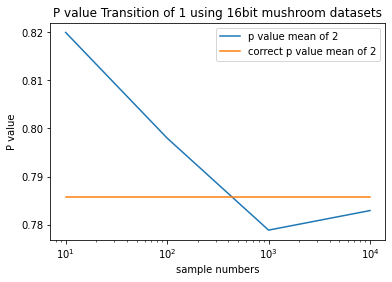

In [34]:
# 画像のプロット先の準備
fig = plt.figure()

#y軸
qubol_conf4_lg_mean_list = []
qubol_conf4_lg_mean_list.append(to_qubol_samples_p_conf4['10']['2'].mean())
qubol_conf4_lg_mean_list.append(to_qubol_samples_p_conf4['100']['2'].mean())
qubol_conf4_lg_mean_list.append(to_qubol_samples_p_conf4['1000']['2'].mean())
qubol_conf4_lg_mean_list.append(to_qubol_samples_p_conf4['10000']['2'].mean())
print(qubol_conf4_lg_mean_list)

plt.plot(numreads_10, qubol_conf4_lg_mean_list, label='p value mean of 2')
plt.plot(numreads_10, [enul_p_conf4['2']]*4, label='correct p value mean of 2')

ax = plt.gca()
ax.set_xscale('log')

plt.title('P value Transition of 1 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('P value')
plt.legend()

fig.savefig('../output/mushrooml/t0t1_conf4_10_10000_meanP.png')

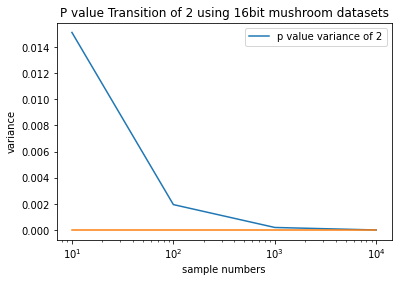

In [35]:
# 画像のプロット先の準備
fig = plt.figure()

#y軸
qubol_conf4_lg_var_list = []
qubol_conf4_lg_var_list.append(to_qubol_samples_p_conf4['10']['2'].var())
qubol_conf4_lg_var_list.append(to_qubol_samples_p_conf4['100']['2'].var())
qubol_conf4_lg_var_list.append(to_qubol_samples_p_conf4['1000']['2'].var())
qubol_conf4_lg_var_list.append(to_qubol_samples_p_conf4['10000']['2'].var())

plt.plot(numreads_10, qubol_conf4_lg_var_list, label='p value variance of 2')
plt.plot(numreads_10, [0]*4)

ax = plt.gca()
ax.set_xscale('log')

plt.title('P value Transition of 2 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('variance')
plt.legend()

fig.savefig('../output/mushrooml/t0t1_conf4_10_10000_varP.png')

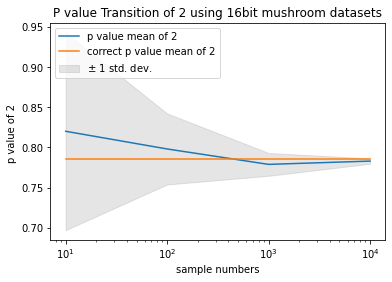

In [36]:
# 画像のプロット先の準備
fig = plt.figure()

# mean±std1
qubol_conf4_lg_std_list = [ii**0.5 for ii in qubol_conf4_lg_var_list]
qubol_conf4_lg_lower = (np.array(qubol_conf4_lg_mean_list) + np.array(qubol_conf4_lg_std_list)).tolist()
qubol_conf4_lg_upper = (np.array(qubol_conf4_lg_mean_list) - np.array(qubol_conf4_lg_std_list)).tolist()
plt.fill_between(numreads_10, qubol_conf4_lg_lower, qubol_conf4_lg_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

# mean
plt.plot(numreads_10, qubol_conf4_lg_mean_list, label='p value mean of 2')

# 本当の値
plt.plot(numreads_10, [enul_p_conf4['2']]*4, label='correct p value mean of 2')

ax = plt.gca()
ax.set_xscale('log')

plt.title('P value Transition of 2 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('p value of 2 ')
plt.legend(loc="upper left")

plt.show()

fig.savefig('../output/mushrooml/t0_10_10000_P.png')

[0.7979999999999999, 0.7837547094188377, 0.7788367367367368, 0.7820751167444963, 0.787984319862634]


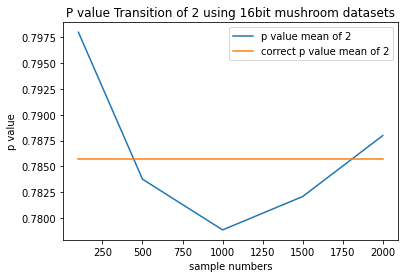

In [37]:
# 画像のプロット先の準備
fig = plt.figure()

#y軸
qubol_conf4_5_mean_list = []
qubol_conf4_5_mean_list.append(to_qubol_samples_p_conf4['100']['2'].mean())
qubol_conf4_5_mean_list.append(to_qubol_samples_p_conf4['500']['2'].mean())
qubol_conf4_5_mean_list.append(to_qubol_samples_p_conf4['1000']['2'].mean())
qubol_conf4_5_mean_list.append(to_qubol_samples_p_conf4['1500']['2'].mean())
qubol_conf4_5_mean_list.append(to_qubol_samples_p_conf4['2000']['2'].mean())
print(qubol_conf4_5_mean_list)

plt.plot(numreads_5, qubol_conf4_5_mean_list, label='p value mean of 2')
plt.plot(numreads_5, [enul_p_conf4['2']]*5, label='correct p value mean of 2')

plt.title('P value Transition of 2 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('p value')
plt.legend()

fig.savefig('../output/mushrooml/t0_100_2000_meanP.png')

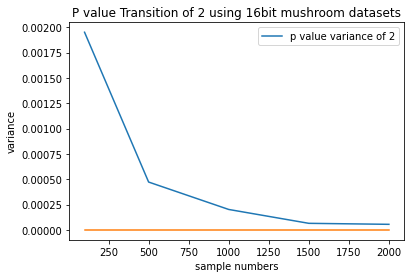

In [38]:
# 画像のプロット先の準備
fig = plt.figure()

#y軸
qubol_conf4_5_var_list = []
qubol_conf4_5_var_list.append(to_qubol_samples_p_conf4['100']['2'].var())
qubol_conf4_5_var_list.append(to_qubol_samples_p_conf4['500']['2'].var())
qubol_conf4_5_var_list.append(to_qubol_samples_p_conf4['1000']['2'].var())
qubol_conf4_5_var_list.append(to_qubol_samples_p_conf4['1500']['2'].var())
qubol_conf4_5_var_list.append(to_qubol_samples_p_conf4['2000']['2'].var())

plt.plot(numreads_5, qubol_conf4_5_var_list, label='p value variance of 2')
plt.plot(numreads_5, [0]*5)

plt.title('P value Transition of 2 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('variance')
plt.legend()

fig.savefig('../output/mushrooml/t0_100_2000_varP.png')

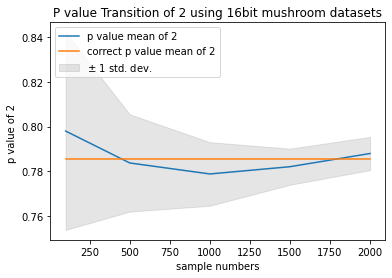

In [39]:
# 画像のプロット先の準備
fig = plt.figure()

# mean±std1
qubol_conf4_5_std_list = [ii**0.5 for ii in qubol_conf4_5_var_list]
qubol_conf4_5_lower = (np.array(qubol_conf4_5_mean_list) + np.array(qubol_conf4_5_std_list)).tolist()
qubol_conf4_5_upper = (np.array(qubol_conf4_5_mean_list) - np.array(qubol_conf4_5_std_list)).tolist()
plt.fill_between(numreads_5, qubol_conf4_5_lower, qubol_conf4_5_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')


# mean
plt.plot(numreads_5, qubol_conf4_5_mean_list, label='p value mean of 2')

# 本当の値
plt.plot(numreads_5, [enul_p_conf4['2']]*5, label='correct p value mean of 2')

plt.title('P value Transition of 2 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('p value of 2 ')
plt.legend(loc="upper left")

plt.show()

fig.savefig('../output/mushrooml/t0_100_2000_P.png')

### 田村さんの結果と比較
- numreads=10, 100, 500, 1000を見る


number of sampling =  10
p-value = 0.7402777777777778 ± 0.12483785780259427
number of sampling =  20
p-value = 0.7833881578947369 ± 0.0973049168355534
number of sampling =  50
p-value = 0.7859438775510204 ± 0.05961052417885592
number of sampling =  100
p-value = 0.794861111111111 ± 0.046010390332168645
number of sampling =  200
p-value = 0.7943121859296483 ± 0.0348509239593451
number of sampling =  500
p-value = 0.7897727955911824 ± 0.01848101216081552
number of sampling =  1000
p-value = 0.7870735735735737 ± 0.014874303713182439

In [45]:
numreads_common = [10, 100, 500, 1000]

In [46]:
numreads_common_mean = qubol_conf4_lg_mean_list[:2]+qubol_conf4_5_mean_list[1:3]
numreads_common_var = qubol_conf4_lg_var_list[:2]+qubol_conf4_5_var_list[1:3]

In [47]:
for i, num in enumerate(numreads_common):
    print('number of sampling = ', num)                
    print('p-value =', numreads_common_mean[i], '±', numreads_common_var[i]**0.5)

number of sampling =  10
p-value = 0.82 ± 0.12292725943057184
number of sampling =  100
p-value = 0.7979999999999999 ± 0.044171383395939845
number of sampling =  500
p-value = 0.7837547094188377 ± 0.021737478043473916
number of sampling =  1000
p-value = 0.7788367367367368 ± 0.014209401588068363
